## IMPORT OF MY OWN LIBRAY

In [430]:
from google.colab import drive
drive.mount('/content/drive')
import sys

sys.path.append('/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/MY_LIBRARY_FOR_OPTIONS_TRADING/')
import my_library_17 as my_lib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## SET BASIC AND COMMON PARAMETERS OF ALL FUNCTIONS

In [339]:
import urllib.parse
import pandas as pd
import requests
from IPython.display import display, HTML

apikey='7112261b-c8d0-4e6b-b9cc-7fd1e5c56752'
secretkey='xoxzuh2k62'
rurl=urllib.parse.quote('https://127.0.0.1:5000/',safe="")

uri=f'https://api.upstox.com/v2/login/authorization/dialog?response_type=code&client_id=7112261b-c8d0-4e6b-b9cc-7fd1e5c56752&redirect_uri=https://127.0.0.1:5000/&state=RnJpIERlYyAxNiAyMDIyIDE1OjU4OjUxIEdNVCswNTMwIChJbmRpYSBTdGFuZGFyZCBUaW1lKQ%3D%3D'
uri
display(HTML(f'<a href="{uri}" target="_blank">Click here to open the URL</a>'))

In [340]:
code='UxVFrf'

In [341]:
access_token_value=my_lib.get_access_token(code,apikey,secretkey)


               Key                                              Value
0            email                             iit2022231@iiita.ac.in
1        exchanges                     [NSE, BSE, CDS, NFO, BFO, BCD]
2         products                                    [OCO, D, CO, I]
3           broker                                             UPSTOX
4          user_id                                             58AUGK
5        user_name                               LAXMI NARAYAN SHARMA
6      order_types                          [MARKET, LIMIT, SL, SL-M]
7        user_type                                         individual
8              poa                                              False
9        is_active                                               True
10    access_token  eyJ0eXAiOiJKV1QiLCJrZXlfaWQiOiJza192MS4wIiwiYW...
11  extended_token                                               None


In [342]:
import yfinance as yf

import datetime as dt
df_only_options_stock=pd.read_excel("https://drive.google.com/uc?export=download&id=1-_aBkcgF1W9LNUJbpE4rUGlMst4iiaWo")
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1Dyt6laIWQNO4p6FHyw335QG8rKLyeXP1")


# symbol='HAL'
# data=yf.download(tickers='HAL.NS',period='max',interval='1d')
# historical_stock_data=data['Adj Close']
# instrument_key=df[df['Symbol']==symbol]['instrument_key'].values[0]

##  SELECTING STOCKS HAVING UNEXPECTED ATM IV WRT TO ITS PAST HISTORY

In [ ]:
# df_only_options_stock=df_only_options_stock[:10]
df_result=my_lib.comparing_atm_iv_with_past_volatility_range(df_only_options_stock,access_token_value)
df_result


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,SYMBOL,MIN,-2STD,-1STD,MEAN,+1STD,+2STD,MAX,STRIKE_PRICE,ATM_IV
0,AARTIIND,5.466075,-11.730296,12.394329,36.518955,60.643580,84.768205,294.567886,740.0,37.48
1,ABB,7.729805,-196.716444,-79.910128,36.896187,153.702503,270.508819,1873.776292,7900.0,35.37
2,ABBOTINDIA,0.000000,-13.622084,0.852253,15.326589,29.800925,44.275261,94.012852,27000.0,27.26
3,ABCAPITAL,12.551156,5.195299,19.527988,33.860677,48.193366,62.526055,92.983603,210.0,34.18
4,ABFRL,16.551393,7.248824,21.510404,35.771984,50.033565,64.295145,91.188353,320.0,30.27
...,...,...,...,...,...,...,...,...,...,...
174,UPL,0.000000,-2.242739,16.584917,35.412574,54.240230,73.067887,175.455917,550.0,25.63
175,VEDL,0.000000,-57.067759,-3.857862,49.352036,102.561933,155.771830,497.090255,430.0,32.71
176,VOLTAS,10.785728,-439.387293,-192.975114,53.437066,299.849245,546.261425,3941.690459,1520.0,34.12
177,WIPRO,8.401105,-176.075165,-66.935698,42.203769,151.343237,260.482704,1745.331547,490.0,24.41


In [ ]:
df_result[(df_result['ATM_IV']>df_result['+1STD']) | (df_result['ATM_IV']<df_result['-1STD'])]

,SYMBOL,MIN,-2STD,-1STD,MEAN,+1STD,+2STD,MAX,STRIKE_PRICE,ATM_IV
8,ALKEM,9.450282,6.030294,14.563596,23.096898,31.630200,40.163502,60.669373,5800.0,35.80
22,BALKRISIND,7.560437,-1.398049,15.875936,33.149921,50.423906,67.697891,127.473995,2850.0,0.00
36,BSOFT,9.830305,1.016724,22.055669,43.094613,64.133558,85.172502,131.241176,570.0,0.00
63,GNFC,8.126387,1.410348,18.887229,36.364111,53.840992,71.317873,101.088510,660.0,86.18
66,GRANULES,6.259053,3.086612,20.114107,37.141602,54.169096,71.196591,111.567476,670.0,19.53
89,INDIACEM,9.184522,-0.158609,22.723088,45.604785,68.486482,91.368179,228.380781,365.0,21.00


## INDIVISUAL ANALYSIS ON STOCKS

# DEFINE THE SYMBOL HERE TO ANALYSE

In [380]:
symbol='HAL'
data=yf.download(tickers='HAL.NS',period='max',interval='1d')
historical_stock_data=data['Adj Close']
instrument_key=df[df['Symbol']==symbol]['instrument_key'].values[0]

[*********************100%%**********************]  1 of 1 completed


In [381]:

current_price=my_lib.get_last_traded_price(access_token_value,instrument_key,symbol)
print(current_price)

4747.75


In [406]:
print(f'linear range for {symbol}  till expiry')
pc,nc,lr,ur=my_lib.linear_range(current_price,historical_stock_data)
print(f'lower bound:{lr},upper bound:{ur} \n')
print(f'exponential range for {symbol} till expiry')
pce,nce,lre,ure=my_lib.exponential_range(current_price,historical_stock_data)
print(f'lower bound:{lre},upper bound:{ure}')

linear range for HAL  till expiry
lower bound:4453.76679878788,upper bound:5255.346175620079 

exponential range for HAL till expiry
lower bound:4462.683606527212,upper bound:5283.4739020755715


In [408]:
num_simulations=10000
print(f'monte carlo  range for {symbol}  till expiry')
lbm,ubm=my_lib.monte_carlo_simulation(current_price,historical_stock_data,num_simulations)
print(f'lower bound  {lbm},upper bound  {ubm}\n')

print(f'geo simulation range for {symbol}  till expiry')
lbg,ubg=my_lib.geometric_brownian_motion_simulation(current_price,historical_stock_data,num_simulations)
print(f'lower bound {lbg},upper bound  {ubg}')

monte carlo  range for HAL  till expiry
lower bound  4207.057405262572,upper bound  5559.887605415823

geo simulation range for HAL  till expiry


lower bound 4213.318729449386,upper bound  5564.278665655983


## CALCULATE MAX PAIN POINT and POINTS TO REMBER


*   AS OI CHANGES EVERY DAY SO IS MAX PAIN SO ITS BETTER TO USE IT IN LAST 15 DAYS TO EXPIRY AS

*   ADD SOME BUFFER TO CURRENT MAX PAIN PRICE TO AVOID THE FLUCATIONS IN PAIN PRICE LETS SAY 5% OF VALUE
*   WRITE OPTIONS ABOVE THIS MAX PAIN PRICE + BUFFER



*   AVOID WRITING PUT OPTIONS AS FEAR SPREAD FASTER THAN GREED





5200.0


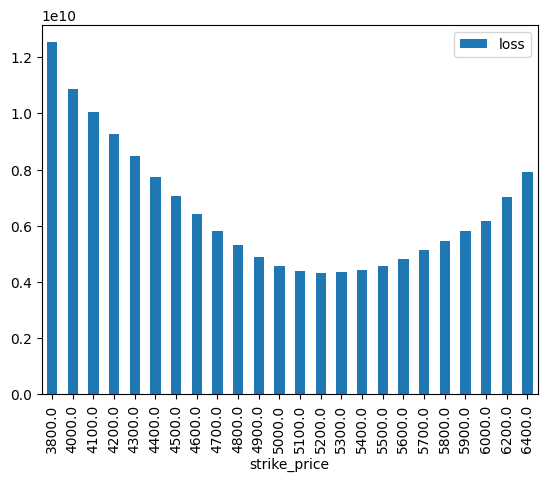

In [427]:
df_call,df_put,df_general=my_lib.import_option_chain_data(instrument_key,access_token_value)
df_loss_corres_to_all_strikes,max_pain_strike=my_lib.max_pain_calculate(df_call,df_put)
df_loss_corres_to_all_strikes.plot(kind='bar',x='strike_price',y='loss')
# df_loss_corres_to_all_strikes.columns
max_pain_strike=max_pain_strike.values[0]
print(max_pain_strike)

In [429]:
df_risk_reward=my_lib.calculate_all_possible_spread_and_max_loss(instrument_key,access_token_value)
# print(df_risk_reward)
from google.colab import sheets
df_risk_reward['max_loss']=df_risk_reward['loss']*300
df_filtered=df_risk_reward[(df_risk_reward['max_loss']<=6000 & (df_risk_reward['strike_2']<=ubm) & (df_risk_reward['strike_2']<=5200)) ]

sheet = sheets.InteractiveSheet(df=df_filtered)

/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/MY_LIBRARY_FOR_OPTIONS_TRADING/my_library_17.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame.drop(index=0,inplace=True)


[4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6200.0, 6400.0]     strike_price     ltp
0         4000.0  745.00
1         4100.0  664.90
2         4200.0  550.45
3         4300.0  481.10
4         4400.0  405.00
5         4500.0  334.00
6         4600.0  260.00
7         4700.0  203.30
8         4800.0  154.65
9         4900.0  116.00
10        5000.0   86.50
11        5100.0   64.00
12        5200.0   48.15
13        5300.0   36.15
14        5400.0   27.50
15        5500.0   22.20
16        5600.0   17.40
17        5700.0   13.80
18        5800.0   11.55
19        5900.0   10.00
20        6000.0    9.00
21        6200.0    5.95
22        6400.0    4.05
                0    loss  profit
22 21  104.263158    1.90  198.10
21 22  104.263158   -1.90 -198.10
19 20   99.000000   -1.00  -99.00
20 19   99.000000    1.00   99.00
22 19   83.033613    5.95  494.05
...        

/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})
